# Assignment 3
### Iman Satyo Adi

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# model
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC # support vector classifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.multioutput import MultiOutputClassifier

# prep data
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split

# evaluasi
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# import data
from sklearn import datasets

# visualisasi Decision Tree model
import sklearn.tree as tree
import pydotplus
from six import StringIO 
from IPython.display import Image

data dapat di download di:
https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [2]:
df = pd.read_csv("dataset/bank.csv", sep=";")
df

age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  duration  campaign  pdays  previous poutcome   y  
0     cellular   19   oct        79         1     -1         0  unknown  no  
1     cellular   11   may       220         1    339         4  failure  no  
2     cellular   16   apr       185         1    330         1  failure  no  
3      unknown    3   jun       199         4     -1         0  unknown  no  
4      unknown    5   may       226         1     -1         0  unknown  no  
...        ...  ...   ...       ...       ...    ...       ...      ...  ..  
4516  cellular   30   jul       329         5     -1         0  unknown  no  
4517   unknown    9   may       153         1     -1         0  unknown  no  
4518  cellular   19   aug       151        11     -1         0  unknown  no  
4519  cellular    6   feb       129         4    211         3    other  no  
4520  cellular    3   apr       345         2    249         7    other  no  

[4521 rows x 17 columns]

In [3]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


None

# 1. Logistic Regression

In [4]:
df_job = df['job']
df_edu = df['education']
df_y = df['y']

le = LabelEncoder()

job_en = le.fit_transform(df_job)
print("job",le.classes_)

edu_en = le.fit_transform(df_edu)
print("education",le.classes_)

y_en = le.fit_transform(df_y)
print("y",le.classes_)

dfl = pd.DataFrame({"job":job_en, "education":edu_en, "y":y_en})
dfl

job ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
education ['primary' 'secondary' 'tertiary' 'unknown']
y ['no' 'yes']


job  education  y
0      10          0  0
1       7          1  0
2       4          2  0
3       4          2  0
4       1          1  0
...   ...        ... ..
4516    7          1  0
4517    6          2  0
4518    9          1  0
4519    1          1  0
4520    2          2  0

[4521 rows x 3 columns]

[[10  7  4 ...  9  1  2]]


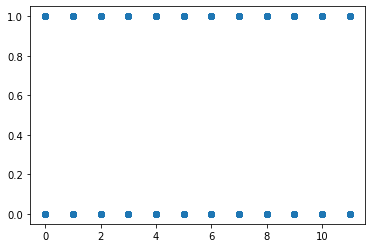

In [5]:
x = np.array(job_en).reshape(1, -1)
y = np.array(y_en) 

print(x)
plt.scatter(x, y)

In [6]:
x = x.T
x.shape

(4521, 1)

In [7]:
y.shape

(4521,)

In [8]:
model = LogisticRegression(solver="liblinear", random_state=0).fit(x, y)

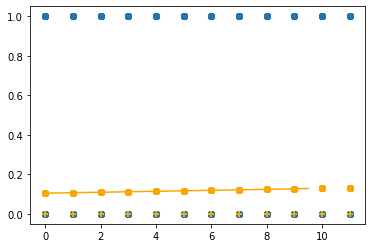

In [9]:
x_dummy = np.arange(0,10,0.5).reshape((-1,1))
y_dummy = model.predict_proba(x_dummy)
y_hasil = model.predict(x_dummy)

plt.scatter(x, y)

plt.plot(x_dummy, y_dummy.T[1], color="orange")
plt.scatter(x, model.predict(x), color="orange", marker="+")
plt.scatter(x, model.predict_proba(x).T[1], color="orange")

In [10]:
cm = confusion_matrix(y, model.predict(x))
cm

array([[4000,    0],
       [ 521,    0]], dtype=int64)

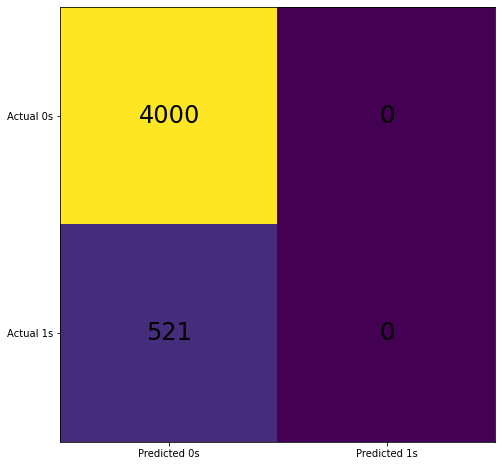

In [11]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black', fontsize=24)
plt.show()

In [12]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      4000
           1       0.00      0.00      0.00       521

    accuracy                           0.88      4521
   macro avg       0.44      0.50      0.47      4521
weighted avg       0.78      0.88      0.83      4521



C:\Users\imans\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\imans\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\imans\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

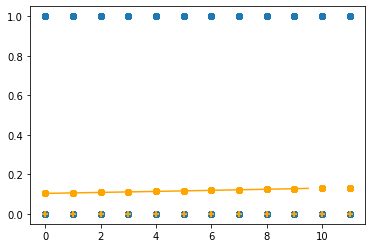

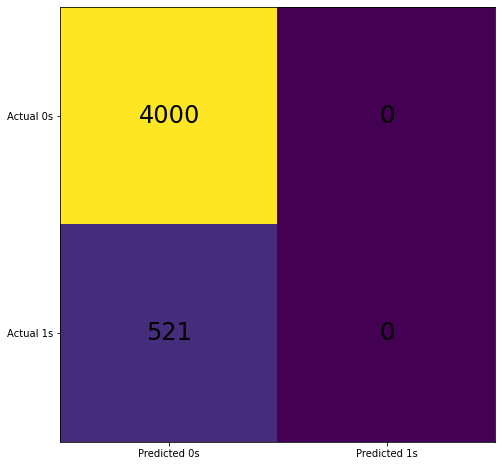

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      4000
           1       0.00      0.00      0.00       521

    accuracy                           0.88      4521
   macro avg       0.44      0.50      0.47      4521
weighted avg       0.78      0.88      0.83      4521



C:\Users\imans\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\imans\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\imans\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [13]:
model = LogisticRegression(solver="liblinear", C=10.0, random_state=0).fit(x, y)

x_dummy = np.arange(0,10,0.5).reshape((-1,1))
y_dummy = model.predict_proba(x_dummy)
y_hasil = model.predict(x_dummy)

plt.scatter(x, y)

plt.plot(x_dummy, y_dummy.T[1], color="orange")
plt.scatter(x, model.predict(x), color="orange", marker="+")
plt.scatter(x, model.predict_proba(x).T[1], color="orange")

cm = confusion_matrix(y, model.predict(x))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black', fontsize=24)
plt.show()

print(classification_report(y, model.predict(x)))

# 2. K-Nearest Neighbor

In [14]:
df

age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  duration  campaign  pdays  previous poutcome   y  
0     cellular   19   oct        79         1     -1         0  unknown  no  
1     cellular   11   may       220         1    339         4  failure  no  
2     cellular   16   apr       185         1    330         1  failure  no  
3      unknown    3   jun       199         4     -1         0  unknown  no  
4      unknown    5   may       226         1     -1         0  unknown  no  
...        ...  ...   ...       ...       ...    ...       ...      ...  ..  
4516  cellular   30   jul       329         5     -1         0  unknown  no  
4517   unknown    9   may       153         1     -1         0  unknown  no  
4518  cellular   19   aug       151        11     -1         0  unknown  no  
4519  cellular    6   feb       129         4    211         3    other  no  
4520  cellular    3   apr       345         2    249         7    other  no  

[4521 rows x 17 columns]

In [15]:
df_job = df['job']
df_edu = df['education']
df_y = df['y']

In [16]:
le = LabelEncoder()

job_en = le.fit_transform(df_job)
print("job",le.classes_)

edu_en = le.fit_transform(df_edu)
print("education",le.classes_)

y_en = le.fit_transform(df_y)
print("y",le.classes_)

df2 = pd.DataFrame({"job":job_en, "education":edu_en, "y":y_en})
df2

job ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
education ['primary' 'secondary' 'tertiary' 'unknown']
y ['no' 'yes']


job  education  y
0      10          0  0
1       7          1  0
2       4          2  0
3       4          2  0
4       1          1  0
...   ...        ... ..
4516    7          1  0
4517    6          2  0
4518    9          1  0
4519    1          1  0
4520    2          2  0

[4521 rows x 3 columns]

In [17]:
features = df2[['job', 'education']]
target = df2['y']

k = 1 
model = KNeighborsClassifier(n_neighbors=k)
model.fit(features, target)

KNeighborsClassifier(n_neighbors=1)

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      4000
           1       0.23      0.14      0.17       521

    accuracy                           0.85      4521
   macro avg       0.56      0.54      0.54      4521
weighted avg       0.82      0.85      0.83      4521



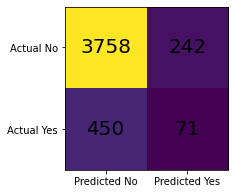

In [18]:
print(classification_report(target, model.predict(features)))

cm = confusion_matrix(target, model.predict(features))
fig, ax = plt.subplots(figsize=(3,3))
ax.imshow(cm)
ax.grid(False)

labels = ["No", "Yes"]
ticklabels_p = []
ticklabels_a = []

for l in labels:
    ticklabels_p.append("Predicted " + str(l))
    ticklabels_a.append("Actual " + str(l))

ax.xaxis.set(ticks=range(len(labels)), ticklabels=ticklabels_p)
ax.yaxis.set(ticks=range(len(labels)), ticklabels=ticklabels_a)
ax.set_ylim(1.5, -0.5)
for i in range(len(labels)):
    for j in range(len(labels)):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black', fontsize=20)
plt.show()

Text(0, 0.5, 'accuracy rate')

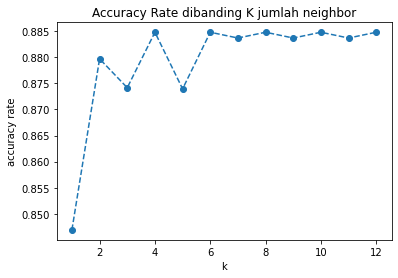

In [19]:
features = df2[['job', 'education']]
target = df2['y']

accuracy_rate = []
for k in range(1, 13):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(features, target)
    accuracy_rate.append(accuracy_score(target, model.predict(features)))

plt.plot(range(1,13), accuracy_rate, marker="o", linestyle="dashed")
plt.title("Accuracy Rate dibanding K jumlah neighbor")
plt.xlabel("k")
plt.ylabel("accuracy rate")

# 3. Support Vector Machine

In [20]:
df

age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  duration  campaign  pdays  previous poutcome   y  
0     cellular   19   oct        79         1     -1         0  unknown  no  
1     cellular   11   may       220         1    339         4  failure  no  
2     cellular   16   apr       185         1    330         1  failure  no  
3      unknown    3   jun       199         4     -1         0  unknown  no  
4      unknown    5   may       226         1     -1         0  unknown  no  
...        ...  ...   ...       ...       ...    ...       ...      ...  ..  
4516  cellular   30   jul       329         5     -1         0  unknown  no  
4517   unknown    9   may       153         1     -1         0  unknown  no  
4518  cellular   19   aug       151        11     -1         0  unknown  no  
4519  cellular    6   feb       129         4    211         3    other  no  
4520  cellular    3   apr       345         2    249         7    other  no  

[4521 rows x 17 columns]

In [21]:
features = df2[['job', 'education']]
target = df2['y']

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=0)
print(x_train.shape, x_test.shape)

(3164, 2) (1357, 2)


In [22]:
model = SVC().fit(x_train, y_train)

print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93      1190
           1       0.00      0.00      0.00       167

    accuracy                           0.88      1357
   macro avg       0.44      0.50      0.47      1357
weighted avg       0.77      0.88      0.82      1357



C:\Users\imans\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\imans\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\imans\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

# 4. Decision Tree

In [23]:
df

age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  duration  campaign  pdays  previous poutcome   y  
0     cellular   19   oct        79         1     -1         0  unknown  no  
1     cellular   11   may       220         1    339         4  failure  no  
2     cellular   16   apr       185         1    330         1  failure  no  
3      unknown    3   jun       199         4     -1         0  unknown  no  
4      unknown    5   may       226         1     -1         0  unknown  no  
...        ...  ...   ...       ...       ...    ...       ...      ...  ..  
4516  cellular   30   jul       329         5     -1         0  unknown  no  
4517   unknown    9   may       153         1     -1         0  unknown  no  
4518  cellular   19   aug       151        11     -1         0  unknown  no  
4519  cellular    6   feb       129         4    211         3    other  no  
4520  cellular    3   apr       345         2    249         7    other  no  

[4521 rows x 17 columns]

In [24]:
df.isna().sum().sum()

0

In [25]:
df_job = df['job']
df_mar = df['marital']
df_edu = df['education']
df_def = df['default']
df_hou = df['housing']
df_loan = df['loan']
df_contact = df['contact']
df_poutcome = df['poutcome']
df_y = df['y']

In [26]:
le = LabelEncoder()

job_en = le.fit_transform(df_job)
print("job",le.classes_)

marital_en = le.fit_transform(df_mar)
print("job",le.classes_)

edu_en = le.fit_transform(df_edu)
print("education",le.classes_)

def_en = le.fit_transform(df_def)
print("default",le.classes_)

hou_en = le.fit_transform(df_hou)
print("housing",le.classes_)

loan_en = le.fit_transform(df_loan)
print("loan",le.classes_)

contact_en = le.fit_transform(df_contact)
print("contact",le.classes_)

poutcome_en = le.fit_transform(df_poutcome)
print("poutcome",le.classes_)

y_en = le.fit_transform(df_y)
print("y",le.classes_)

df3 = pd.DataFrame({"job":job_en, "marital":marital_en, "education":edu_en, "default":def_en, "housing":hou_en, "loan":loan_en, "contact":contact_en, "poutcome":poutcome_en, "y":y_en})
df3

job ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
job ['divorced' 'married' 'single']
education ['primary' 'secondary' 'tertiary' 'unknown']
default ['no' 'yes']
housing ['no' 'yes']
loan ['no' 'yes']
contact ['cellular' 'telephone' 'unknown']
poutcome ['failure' 'other' 'success' 'unknown']
y ['no' 'yes']


job  marital  education  default  housing  loan  contact  poutcome  y
0      10        1          0        0        0     0        0         3  0
1       7        1          1        0        1     1        0         0  0
2       4        2          2        0        1     0        0         0  0
3       4        1          2        0        1     1        2         3  0
4       1        1          1        0        1     0        2         3  0
...   ...      ...        ...      ...      ...   ...      ...       ... ..
4516    7        1          1        0        1     0        0         3  0
4517    6        1          2        1        1     1        2         3  0
4518    9        1          1        0        0     0        0         3  0
4519    1        1          1        0        0     0        0         1  0
4520    2        2          2        0        1     1        0         1  0

[4521 rows x 9 columns]

In [27]:
feature_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']

In [28]:
features = df3[feature_cols]
target = df3['y']

x_train, x_test, y_train, y_test = train_test_split(
    features, target, test_size=0.3, random_state=1)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(3164, 8) (1357, 8)
(3164,) (1357,)


In [29]:
model = DecisionTreeClassifier(random_state=0)
model.fit(x_train, y_train)

hasil_prediksi = model.predict(x_test)

# evaluasi
print(classification_report(y_test, hasil_prediksi))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1182
           1       0.37      0.13      0.19       175

    accuracy                           0.86      1357
   macro avg       0.62      0.55      0.56      1357
weighted avg       0.82      0.86      0.83      1357



In [30]:
dot_data = StringIO()
tree.export_graphviz(model,
                     out_file=dot_data,
                     class_names=['sehat', 'diabet'],
                     feature_names=feature_cols,
                     filled=True,
                     rounded=True,
                     special_characters=True
                    )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# 5. Random Forest

In [31]:
model = RandomForestClassifier(random_state=10)
model.fit(x_train, y_train)

hasil_prediksi = model.predict(x_test)

print(classification_report(y_test, hasil_prediksi))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93      1182
           1       0.45      0.14      0.22       175

    accuracy                           0.87      1357
   macro avg       0.67      0.56      0.57      1357
weighted avg       0.83      0.87      0.84      1357



In [32]:
model = RandomForestClassifier(random_state=10,
                               max_depth=3,
                               criterion='gini',
                               n_estimators=300)
model.fit(x_train, y_train)

hasil_prediksi = model.predict(x_test)

print(classification_report(y_test, hasil_prediksi))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1182
           1       0.00      0.00      0.00       175

    accuracy                           0.87      1357
   macro avg       0.44      0.50      0.47      1357
weighted avg       0.76      0.87      0.81      1357



C:\Users\imans\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\imans\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\imans\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [33]:
print(model.feature_importances_)
print(feature_cols)

[0.08748516 0.03664134 0.04240463 0.00866348 0.11276483 0.05370982
 0.23447032 0.42386042]
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']


In [34]:
pd.DataFrame({
    "nama fitur": feature_cols, 
    "% importance":model.feature_importances_ 
}).sort_values("% importance", ascending=False)

nama fitur  % importance
7   poutcome      0.423860
6    contact      0.234470
4    housing      0.112765
0        job      0.087485
5       loan      0.053710
2  education      0.042405
1    marital      0.036641
3    default      0.008663

In [35]:
cols = ['poutcome', 'contact', 'housing']
features = x_train[cols]
target = y_train

model = RandomForestClassifier(random_state=10,
                               max_depth=3,
                               criterion='gini',
                               n_estimators=100)
model.fit(features, target)

hasil_prediksi = model.predict(x_test[cols])
print(classification_report(y_test, hasil_prediksi))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1182
           1       0.00      0.00      0.00       175

    accuracy                           0.87      1357
   macro avg       0.44      0.50      0.47      1357
weighted avg       0.76      0.87      0.81      1357



C:\Users\imans\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\imans\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\imans\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

# 6. Naive Bayes

In [36]:
le = LabelEncoder()

job_en = le.fit_transform(df_job)
job_label = le.classes_

edu_en = le.fit_transform(df_edu)
edu_label = le.classes_

y_en = le.fit_transform(df_y)
y_label = le.classes_

print("job", job_label)
print("education", edu_label)
print("y", y_label)

df = pd.DataFrame({"job": job_en, "education":edu_en, "y":y_en})
features = df[['job', 'education']]
target = df['y']

print(features)
print(target)

job ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
education ['primary' 'secondary' 'tertiary' 'unknown']
y ['no' 'yes']
      job  education
0      10          0
1       7          1
2       4          2
3       4          2
4       1          1
...   ...        ...
4516    7          1
4517    6          2
4518    9          1
4519    1          1
4520    2          2

[4521 rows x 2 columns]
0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: y, Length: 4521, dtype: int32


In [37]:
model = GaussianNB()
model.fit(features, target)

GaussianNB()

In [38]:
model.predict([[1,1]])

C:\Users\imans\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0])

In [39]:
model.score(features, target)

0.8847600088476001

In [40]:
print(classification_report(target, model.predict(features)))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      4000
           1       0.00      0.00      0.00       521

    accuracy                           0.88      4521
   macro avg       0.44      0.50      0.47      4521
weighted avg       0.78      0.88      0.83      4521



C:\Users\imans\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\imans\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\imans\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [41]:
print(confusion_matrix(target, model.predict(features)))

[[4000    0]
 [ 521    0]]


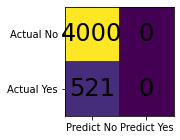

In [42]:
cm = confusion_matrix(target, model.predict(features))
fig, ax = plt.subplots(figsize=(2,2))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predict No', 'Predict Yes'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual No', 'Actual Yes'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black', fontsize=24)
plt.show()

# 7. Confusion Matrix

In [43]:
cm = confusion_matrix(target, model.predict(features))
cm

array([[4000,    0],
       [ 521,    0]], dtype=int64)

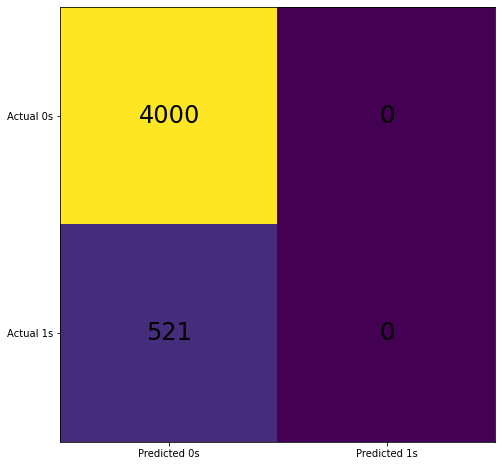

In [44]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black', fontsize=24)
plt.show()

classification